In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

**Uploading Dataset**

In [3]:
df = pd.read_csv('/content/book.csv')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [42]:
df1 = df.copy()

**EDA**

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [44]:
df1.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [46]:
df1.shape

(2000, 11)

In [9]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



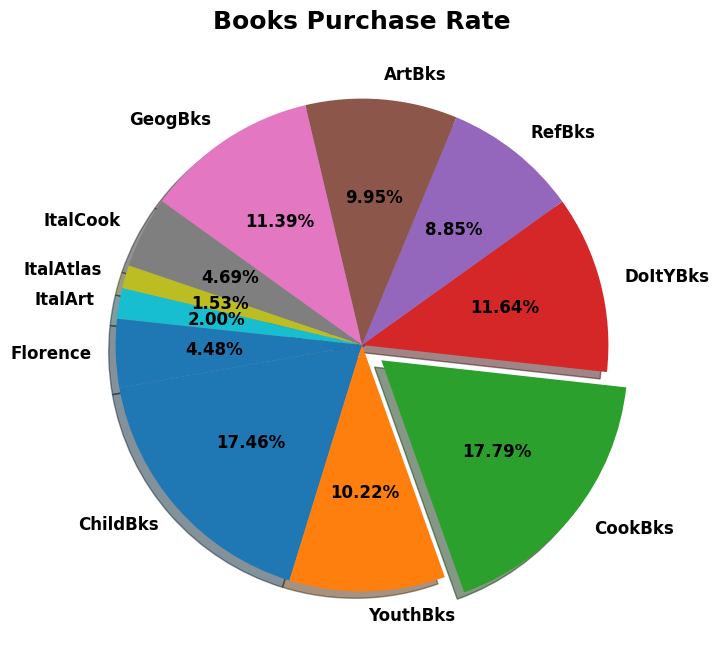

In [11]:
plt.figure(figsize = (12,8))
plt.pie(df.sum(),
       labels=df.columns,
       explode = [0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

In [12]:
count = df.loc[:,:].sum()
count.sort_values(0,ascending=False,inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns={'index':'items',0:'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


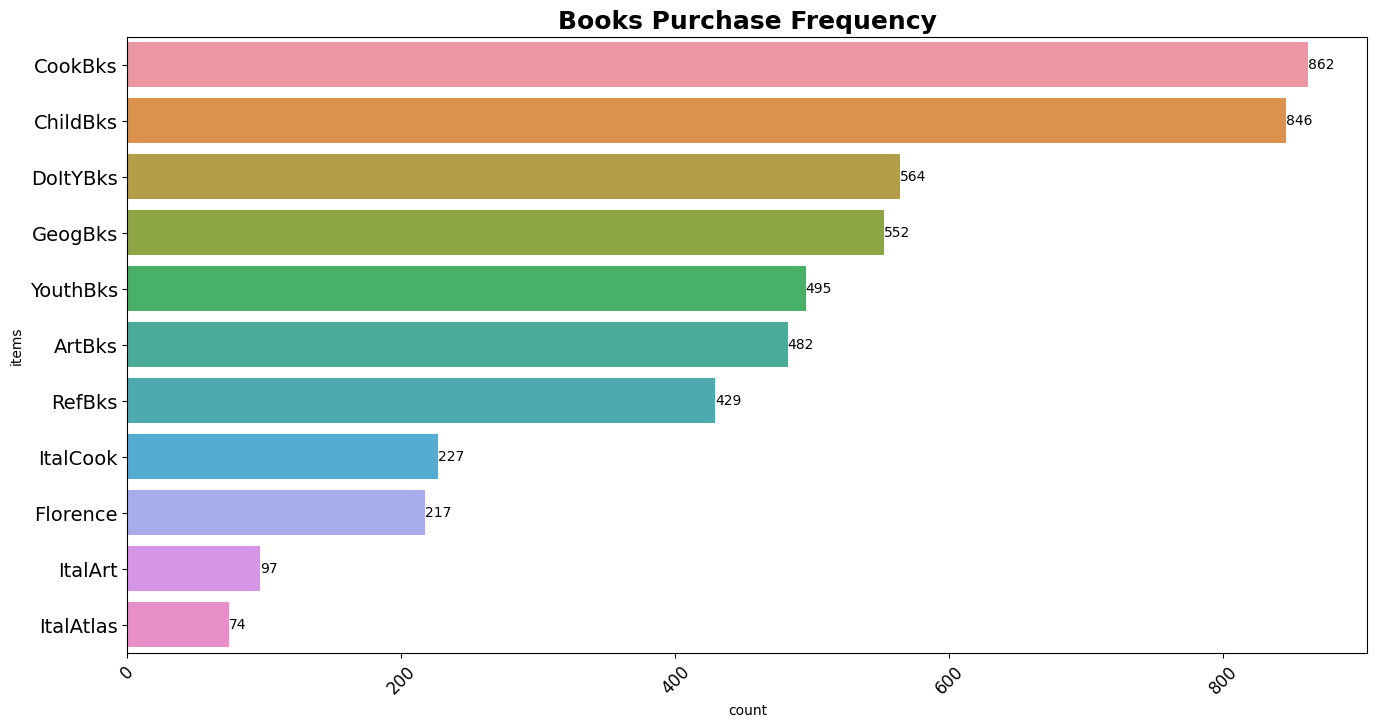

In [14]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x='count',y='items',data=count)
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.title('Books Purchase Frequency',fontsize=18,fontweight='bold')
for i in ax.containers:
  ax.bar_label(i,)

In [15]:
item_sets = {}

In [16]:
te = TransactionEncoder()

In [47]:
te_ary = te.fit(df1).transform(df1)

In [48]:
ap = pd.DataFrame(te_ary,columns=te.columns_)

**APRIORI ALGORITHM**

In [49]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [50]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [54]:
def gen_rules(df,confidence,support):
  ap={}
  for i in confidence:
    ap_i = apriori(df1,support,True)
    rule = association_rules(ap_i,min_threshold=i)
    ap[i]=len(rule.antecedents)
  return pd.Series(ap).to_frame('Support: %s'%support)

In [55]:
confs = []

In [56]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

In [57]:
all_conf = pd.concat(confs,axis=1)

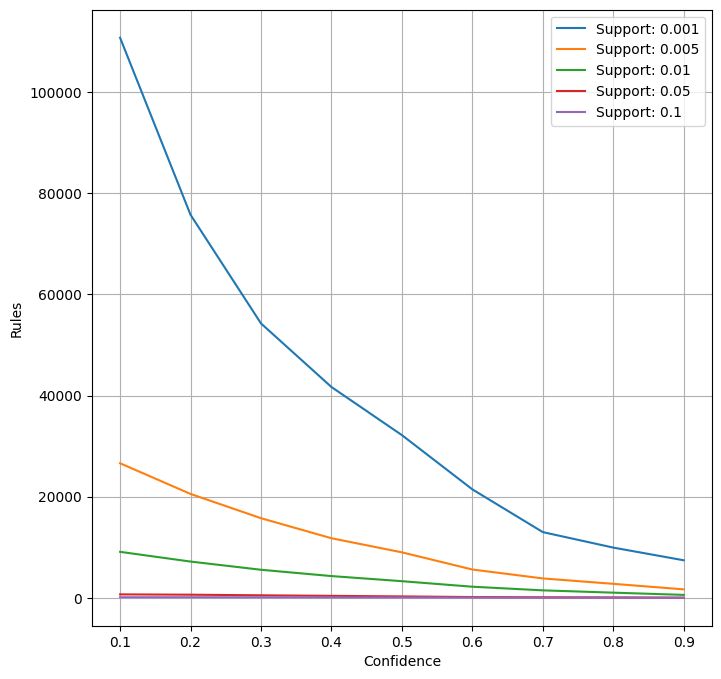

In [58]:
all_conf.plot(figsize=(8,8),grid=True)
plt.xlabel('Confidence')
plt.ylabel('Rules')
plt.show()

Let's try with Support 0.01 and Confidence 0.4

In [59]:
ap_final=apriori(ap,0.001,True)

In [60]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [61]:
rules_final[rules_final['confidence']>0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940,0.998498
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925,0.997747
6,(r),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
...,...,...,...,...,...,...,...,...,...,...
738,"(Y, s)","(o, t, B, k)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf,1.000000
739,"(Y, k)","(o, s, t, B)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf,1.000000
741,"(t, B)","(o, Y, s, k)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970,1.000000
742,"(o, t)","(Y, s, B, k)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970,1.000000


In [62]:
support = rules_final['support']
confidence = rules_final['confidence']
lift = rules_final['lift']

Text(0.5, 0, 'lift')

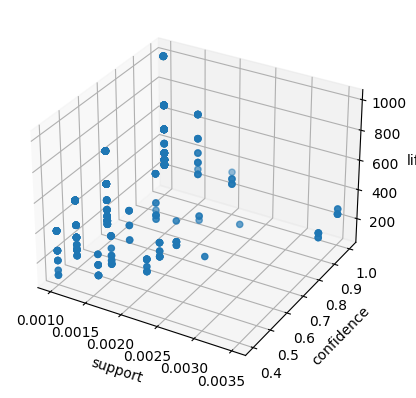

In [63]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel('support')
ax1.set_ylabel('confidence')
ax1.set_zlabel('lift')

Text(0, 0.5, 'confidence')

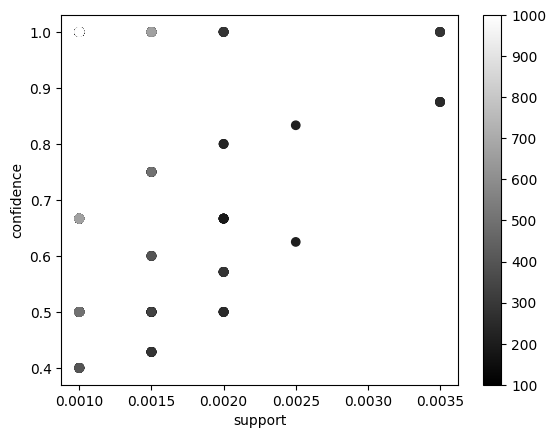

In [67]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")